In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.ticker as ticker

In [7]:
with open("./20000_starting_hand_score.json") as f:
    starting_hand_scores = json.load(f)

with open('./scores.json') as f:
    handscores = json.load(f)

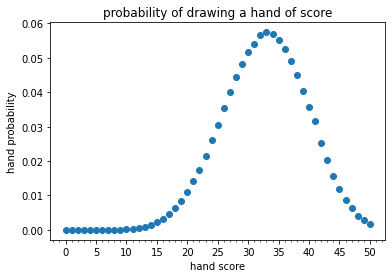

In [8]:
score_distributions = {s: len(h) for s, h in handscores.items()}

names = list(score_distributions.keys())
values = list(score_distributions.values())

# plt.scatter(names, values)
total = sum(values)
normalized = list(map(lambda x: x / total, values))
assert sum(normalized) == 1

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.ylabel('hand probability')
plt.xlabel('hand score')
plt.title('probability of drawing a hand of score')
plt.scatter(names, normalized)

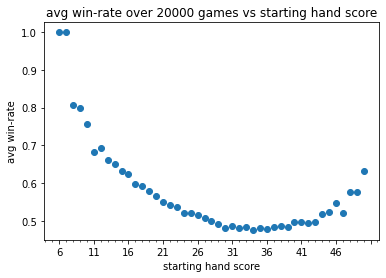

In [9]:
wins = [r['player_0_win_mean'] for r in starting_hand_scores]
shandscores = [r['starting_hand_score'] for r in starting_hand_scores]

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.ylabel('avg win-rate')
plt.xlabel('starting hand score')
plt.title('avg win-rate over 20000 games vs starting hand score')
plt.scatter(shandscores, wins)

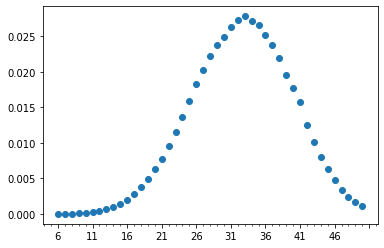

In [10]:
wins = np.array(wins)
handscores = np.array([n for n in normalized if n != 0])

winprobs = wins * handscores

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.scatter(shandscores, winprobs)